0 torch.Size([64, 1, 40, 40]) torch.Size([64])


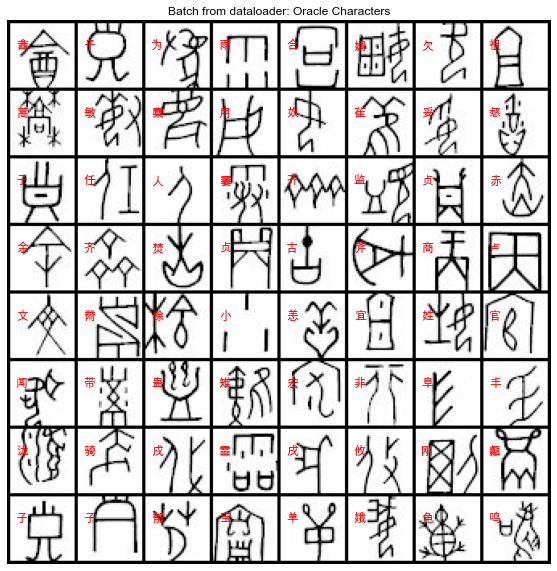

0 torch.Size([64, 1, 40, 40]) torch.Size([64])


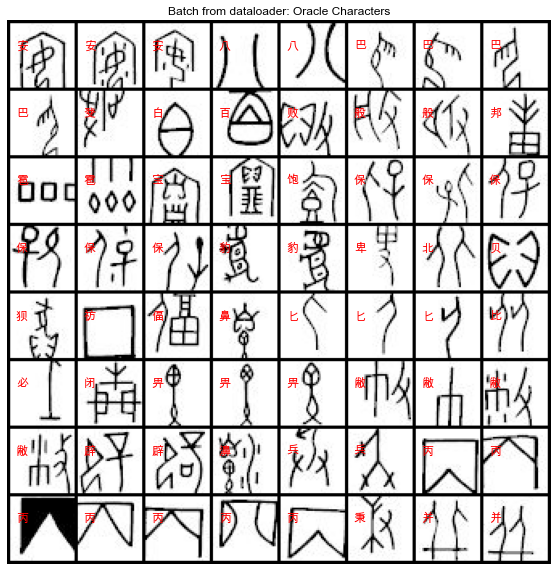

In [8]:

import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


from obs.make_dataset import create_dataloader, show_oracle_character


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
plt.ion()   # interactive mode

csv_file="../data/processed/image_name_label.csv"
root_dir='../data/raw/image/'


training_loader, dataset = create_dataloader(csv_file, root_dir, batch_size=64, rescale_size=50, randomcrop_size=40)

validation_loader, dataset = create_dataloader(csv_file, root_dir, batch_size=64, rescale_size=50, randomcrop_size=40, datatype='validation')

def show_loader_batch(dataloader):
    for i_batch, sample_batched in enumerate(dataloader):
        print(i_batch, sample_batched['image'].size(),
            sample_batched['label'].size())
        plt.figure(figsize=(10,10))
        show_oracle_character(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        if i_batch == 0:
            break                      

show_loader_batch(training_loader)
show_loader_batch(validation_loader)


In [4]:
label2name_frame = pd.read_csv("../data/processed/label_name.csv")
class_number = len(label2name_frame)
print('Total class number is {}'.format(class_number))
label2name_frame

id2name = area_dict = dict(zip(label2name_frame.label, label2name_frame.name))
id2name

Total class number is 793


{0: '子',
 1: '合',
 2: '酉',
 3: '莫',
 4: '朿',
 5: '执',
 6: '戌',
 7: '戊',
 8: '丙',
 9: '辰',
 10: '疐',
 11: '老',
 12: '庚',
 13: '疋',
 14: '束',
 15: '卢',
 16: '毓',
 17: '壶',
 18: '商',
 19: '雨',
 20: '匜',
 21: '未',
 22: '鬲',
 23: '韦',
 24: '保',
 25: '中',
 26: '梦',
 27: '史',
 28: '咙',
 29: '车',
 30: '眢',
 31: '丁',
 32: '疾',
 33: '帚',
 34: '耤',
 35: '危',
 36: '齿',
 37: '示',
 38: '奭',
 39: '丰',
 40: '亥',
 41: '寅',
 42: '羌',
 43: '宜',
 44: '橐',
 45: '风',
 46: '龠',
 47: '丘',
 48: '巳',
 49: '并',
 50: '鸟',
 51: '祝',
 52: '西',
 53: '贮',
 54: '永',
 55: '襄',
 56: '戚',
 57: '袁',
 58: '黹',
 59: '我',
 60: '雇',
 61: '毌',
 62: '萑',
 63: '典',
 64: '泉',
 65: '封',
 66: '龟',
 67: '者',
 68: '贞',
 69: '午',
 70: '美',
 71: '乃',
 72: '寻',
 73: '舞',
 74: '郁',
 75: '焚',
 76: '奚',
 77: '方',
 78: '戠',
 79: '鸡',
 80: '辛',
 81: '晶',
 82: '宿',
 83: '呈',
 84: '王',
 85: '黍',
 86: '朝',
 87: '饮',
 88: '雝',
 89: '壴',
 90: '九',
 91: '爵',
 92: '矢',
 93: '六',
 94: '仓',
 95: '亳',
 96: '首',
 97: '土',
 98: '洀',
 99: '雷',
 100: '良',

## AutoEncoder Model

In [11]:
# class Autoencoder(nn.Module):
#     def __init__(self, W=40, H=40):
#         super().__init__()
#         # Building an linear encoder with Linear
#         # layer followed by Relu activation function
#         self.encoder = torch.nn.Sequential(
#             torch.nn.Linear(W * H, 800),
#             torch.nn.ReLU(),
#             torch.nn.Linear(800, 400),
#             torch.nn.ReLU(),
#             torch.nn.Linear(400, 200),
#         )
#         # Building an linear decoder with Linear
#         # layer followed by Relu activation function
#         # The Sigmoid activation function
#         # outputs the value between 0 and 1
#         # 9 ==> 784
#         self.decoder = torch.nn.Sequential(
#             torch.nn.Linear(200, 400),
#             torch.nn.ReLU(),
#             torch.nn.Linear(400, 800),
#             torch.nn.ReLU(),
#             torch.nn.Linear(800, W*H),
#             torch.nn.Sigmoid()
#         )
#     def forward(self, x):
#         enc = self.encoder(x)
#         dec = self.decoder(enc)
#         return dec


# model = Autoencoder().cpu()

# distance = nn.MSELoss()

# #distance = nn.BCELoss()
# #distance = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5)
# # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# num_epochs = 200
# for epoch in range(num_epochs):
#     for data in training_loader:
#         img  = data['image'].float() 
#         img = Variable(img) 
#         output = model(img) 

#         loss = distance(output, img)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     if epoch % 10 == 0:
#         print('epoch [{}/{}], loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))        

In [ ]:
# torch.save(model, 'model_ae.pth')
# model_reloaded = torch.load('model_ae.pth')

In [ ]:
# sample = dataset[100]['image']
# sample.shape
# model_reloaded.eval()
# prediction = model_reloaded(sample.unsqueeze(0).float())

In [ ]:
# plt.imshow(sample.numpy().squeeze(), cmap='gray')
# plt.imshow(prediction.detach().numpy().squeeze(), cmap='gray')

In [12]:
class UNetSmall(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNetSmall, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        factor = 2 if bilinear else 1
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256 // factor)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x = self.up3(x3, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits
        
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)

        return logits


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(
                scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(
                in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


In [14]:
model_unet = UNetSmall(1, 2)
distance = nn.MSELoss()
#distance = nn.BCELoss()
#distance = nn.BCEWithLogitsLoss()
#optimizer = torch.optim.Adam(model_unet.parameters(), weight_decay=1e-5)
optimizer = torch.optim.SGD(model_unet.parameters(), lr=0.01, momentum=0.5)

num_epochs = 200
for epoch in range(num_epochs):
    for data in training_loader:
        img  = data['image'].float() 
        img = Variable(img) 
        output = model_unet(img) 

        loss = distance(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print('epoch [{}/{}], loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))       

epoch [1/200], loss: 0.0355
epoch [11/200], loss: 0.0054
epoch [21/200], loss: 0.0033
epoch [31/200], loss: 0.0052
epoch [41/200], loss: 0.0056
epoch [51/200], loss: 0.0021
epoch [61/200], loss: 0.0026
epoch [71/200], loss: 0.0045
epoch [81/200], loss: 0.0098
epoch [91/200], loss: 0.0049
epoch [101/200], loss: 0.0027
epoch [111/200], loss: 0.0033
epoch [121/200], loss: 0.0011
epoch [131/200], loss: 0.0020
epoch [141/200], loss: 0.0013
epoch [151/200], loss: 0.0049
epoch [161/200], loss: 0.0014
epoch [171/200], loss: 0.0007
epoch [181/200], loss: 0.0020
epoch [191/200], loss: 0.0048


In [16]:
torch.save(model_unet, 'model_unet.pth')
model_unet_reloaded =  torch.load('model_unet.pth')
model_unet_reloaded.eval()
# prediction = model_unet_reloaded(sample.unsqueeze(0).float())



UNetSmall(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, m

torch.Size([1, 2, 40, 40])


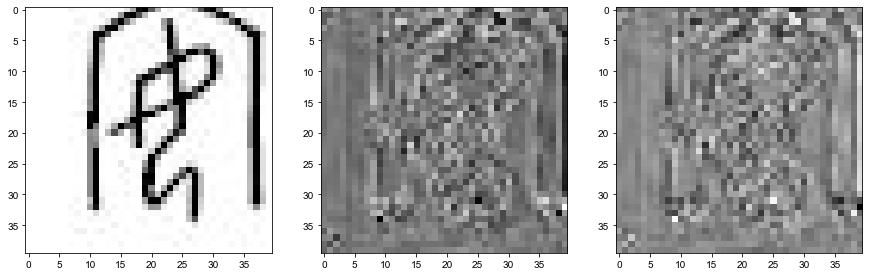

In [17]:
sample = sample = dataset[0]['image']

prediction = model_unet_reloaded(sample.unsqueeze(0).float())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(sample.numpy().squeeze(), cmap='gray')


probs = F.softmax(prediction, dim=1)
# probs = torch.sigmoid(prediction)
print(probs.shape)
layer_0 = probs.detach().numpy()[:,0,:,:].squeeze()
layer_1 = probs.detach().numpy()[:,1,:,:].squeeze()

axs[1].imshow(layer_0, cmap='gray')
axs[2].imshow(layer_1, cmap='gray')